Name: Kevin Zhang


**Final Project**

I went onto the website that the data came from and I found the following attribute information. (This is copied and pasted from the website itself)

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG

For the two traditional machine learning algorithms that I have chosen, I couldn't really do a polynomial regression or any other regressions other than linear regression for the data since the data set wasn't suitable for it, so instead I used linear regression twice for different aspects of the data set. For the neural network, I wanted to do a regression MLP with sequential API, but it seemed that the data wasn't suitable for that either.

Here I import the numpy, mathplot, and Panda libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

I have chosen the regression dataset to be the data set that I am using for this final project. First, I needed to collect the data from the URL, next I needed to generate an array from the data, and then reshape it

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = np.genfromtxt(url, delimiter=',', dtype=None, usecols=[0])
data=data.reshape(398,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


Unfortunately, the data set that was imported in had data encoded in the form of numpy.bytes objects so first I had to create a for loop that first converts the objects into strings and then do a split string that splits up the string into its individual data components.

In [ ]:
n = []
for x in range(0, 398):
  nn=data[x][0].decode('UTF-8').split()
  n.append(nn)

For some reason, I was unable to create a two-dimensional numpy array after splitting the data components so therefore I had to transfer the columns of data that I'm going to use into a regular python list. I used a for Loop to copy all the data in. Next, I converted the lists into numpy arrays so that I can perform operations on it using functions designed for numpy arrays. Here I decided to use the second (cylinders) and third column (displacement) for linear regression analysis.

In [ ]:
A = [None] * 398 
B = [None] * 398 
for i in range(0, 398):
  A[i]=int(n[i][1])
  B[i]=float(n[i][2])
X = np.array(A)
y = np.array(B)

Here I split the data set into training set (70%) and test set (30%) using the train_test_split method.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

I create a linear regression object and train the model using the training sets (after they have been reshaped).

In [ ]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predictions are made using the testing sets and assigned to variables accordingly.

In [ ]:
y_pred = regr.predict(y_test.reshape(-1, 1))
x_pred = regr.predict(x_test.reshape(-1, 1))

I initialize variables to hold the regression coefficient and intercept and print out both variables.

In [ ]:
coefficients = regr.coef_
intercept = regr.intercept_
print(coefficients)
print(intercept)

[[57.35817391]]
[-119.65727494]


Here I plot a scatter plot using the test variables, in addition, this includes a regression line, a linear line of best fit that goes through the data. The X and Y axis are labeled accordingly. The scatterplot below shows a huge positive correlation between the number of cylinders a vehicle has and its displacement. This doesn't necessarily mean that the number of cylinders directly causes its displacement to increase because correlation does not imply causation, but it does show that on average, larger amounts of cylinders are associated with higher displacement. Based on viewing the graph, I can tell that the regression line is accurate in being a line of best fit.

Text(0, 0.5, 'displacement')

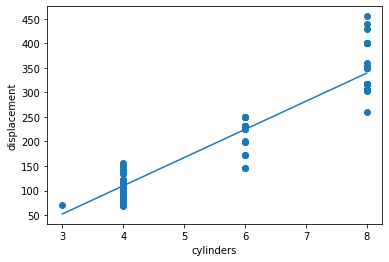

In [ ]:
plt.scatter(x_test, y_test)
y=coefficients*[3, 8]+intercept
plt.plot([3, 8], y[0])
plt.xlabel('cylinders')
plt.ylabel('displacement')

I am using the third column (displacement) and fifth column (weight) for linear regression analysis.

In [ ]:
A = [None] * 398 
B = [None] * 398 
for i in range(0, 398):
  A[i]=float(n[i][2])
  B[i]=float(n[i][4])
X = np.array(A)
y = np.array(B)

Here I split the data set into training set (70%) and test set (30%) using the train_test_split method.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

I create a linear regression object and train the model using the training sets (after they have been reshaped).

In [ ]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predictions are made using the testing sets and assigned to variables accordingly.

In [ ]:
y_pred = regr.predict(y_test.reshape(-1, 1))
x_pred = regr.predict(x_test.reshape(-1, 1))


I initialize variables to hold the regression coefficient and intercept and print out both variables.

In [ ]:
coefficients = regr.coef_
intercept = regr.intercept_
print(coefficients)
print(intercept)

[[7.55085565]]
[1498.09425099]


Here I plot a scatter plot using the test variables, in addition, this includes a regression line, a linear line of best fit that goes through the data. The X and Y axis are labeled accordingly. The scatterplot below shows a huge positive correlation between the weight of a vehicle has and its displacement. This doesn't necessarily mean that the vehicle's weight directly causes its displacement to increase because correlation does not imply causation, but it does show that on average, heaver vehicles are associated with higher displacement. Based on viewing the graph, I can tell that the regression line is accurate in being a line of best fit.

Text(0, 0.5, 'weight')

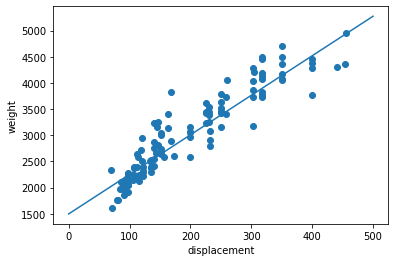

In [ ]:
plt.scatter(x_test, y_test)
y=coefficients*[0, 500]+intercept
plt.plot([0, 500], y[0])
plt.xlabel('displacement')
plt.ylabel('weight')

I was originally planning to use the same columns I used for the second linear regression of weight and displacement for the neural network.

In [ ]:
A = [None] * 398 
B = [None] * 398 
for i in range(0, 398):
  A[i]=float(n[i][2])
  B[i]=float(n[i][4])
X = np.array(A)
y = np.array(B)

This was the place where I was about to do the neural network part of the problem. Unfortunately, I ran into errors while transforming my data that I was unable to resolve and therefore I wasn't able to get that part working. I still included the code for the whole neural network program to give a sense of what I would have done if I was able to get it working. I succeeded in splitting the data set into training and test sets and splitting the training sets into smaller training sets with valid sets. However, as I was trying to apply feature scaling to the x sets, on the X_valid set, it ran into an error with the shape of the data set which I could not solve.

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
 X, y)
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(1, -1))
X_valid = scaler.transform(X_valid.reshape(-1, 1)) #this is the place where I ran into error, I couldn't fix the problem
X_test = scaler.transform(X_test)

ValueError: ignored

Here I would've built a sequential API with two dense layers, one with 30 neurons and input shape of the X_train and the other with 1 neuron. I would then compile the model with a loss function of the mean squared error and look at the accuracy of it.

In [ ]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")